# 1. Introduction

<img src="http://pytroll.github.io/logos/pytroll_light_small.png" width="250px"></img>

This notebook is the introduction to the half-day tutorial on the Satpy library.

Satpy is a python library that can be used to work with various earth-observing satellite instrument data and was created by the Pytroll open source software group. Satpy is the result of multiple projects, including Pytroll mpop and CSPP Polar2Grid, combining efforts to build a better project. Development of the Satpy library started in late 2015 and has been designed to assist scientists and researchers in working with these data. One of the main original goals and use cases was to generate high quality, high resolution imagery as quickly as possible in a configured operational server environment. Over the years following its creation, Satpy has grown to support more use cases while also becoming more compatible with other open source python tools. The high level functionality of Satpy includes:

- reading data files
- compositing data products together (ex. RGB images)
- resampling data to new geographic projections
- writing data to on-disk formats
- using the data with other python-based visualization tools

This tutorial is made up of multiple Jupyter notebooks and as a whole will provide an overview of the Satpy library; what it can do and how to use it. Throughout the tutorial we'll use Satpy to read and analyze real satellite instrument data. We'll go over the breadth of features provided by Satpy and leave detailed scientific analysis as an exercise for the reader.

**NOTE**: If you are unable to properly set up a local environment to run the notebooks, be aware that these examples can also be run interactively in the cloud using [Pangeo's BinderHub](http://pangeo-data.org) through a JupyterLab interface. See the [README](https://github.com/pytroll/tutorial-satpy-half-day/blob/main/README.rst) file of this repository for more information (repository linked below).

## Useful links

* [Pytroll Home](http://pytroll.github.io)
* [Pytroll Slack Team](http://pytroll.slack.com)
* [Tutorial Repository](https://github.com/pytroll/tutorial-satpy-half-day)
* [Satpy Repository](https://github.com/pytroll/satpy)
* [Satpy Documentation](https://satpy.readthedocs.io/en/latest/)

## Setup and installation

Let's install some packages to start with.

In [2]:
!conda install -y netcdf4
!pip install satpy pyresample pyorbital

Solving environment: done

# All requested packages already installed.



Then, let's check that everything is in order to run this notebook.

In [5]:
from satpy.utils import check_satpy
import rasterio
check_satpy(readers=['seviri_l1b_hrit'],
            writers=['geotiff', 'cf', 'simple_image'],
            extras=['cartopy', 'geoviews'])

Readers
seviri_l1b_hrit:  ok

Writers
cf:  ok
geotiff:  ok
simple_image:  ok

Extras
cartopy:  ok
geoviews:  ok



Finally, let's configure the default figure size

In [3]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 9

## What are we working with?

We will be working with earth-observing meteorological satellite instrument
data. There are many different variations of how the data can be structured,
what it physically represents, how it changes over time, and how it can be used
in a particular type of application. The following is an overview of some common
characteristics of meteorological satellite observations. We'll go in to a few
details as we explore real data later on and completely ignore other
details for simplicity.

### Earth-observing

Satpy operates on data from earth-observing satellite instruments. The data
can be used to study changes in the atmosphere, vegetation, oceans,
pollution, and many others.

<img src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/GOES-16_ABI_RadF_true_color_20180910_170031_GOES-East.small.png" alt="GOES-16 ABI Full Disk True Color" width="400"/>

### Geostationary versus Polar-orbiting

Satellites can be in a high-altitude geostationary orbit or a lower altitude
polar-orbiting orbit. Geostationary satellites typically provide observations
at higher temporal rates of the same region faster (~30s in some), but usually
have a lower spatial resolution and only see part of the Earth.
Polar orbiters are usually at a higher spatial resolution and cover
much more of the Earth, but it takes longer to get all of this coverage.

<table>
    <tr>
        <th style="text-align:center">Geostationary</th>
        <th style="text-align:center">Polar-orbiting</th>
    <tr>
        <td>
            <video width="320" height="240" controls src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/geostationary_orbit.mp4"></video>
        </td>
        <td>
            <video width="320" height="240" controls src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/polar_orbit_with_path.mp4"></video>
        </td>
    </tr>
</table>

<sub>Credit: Clayton Suplinski, SSEC, UW-Madison</sub>

### Imagery

The instrument data we will be working with is imagery data; data from
"imager" instruments. In most cases, these arrays of data points can be
thought of as a 2D image of pixels.


<table>
    <tr>
        <td>
            <img src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/array_print_10.png" alt="Array Values" width="300"/>
        </td>
        <td><font size="30px">&rarr;</font></td>
        <td>
            <img src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/array_imshow_10.png" alt="Array Plot" width="300"/>
        </td>
    </tr>
</table>

### Geolocated

The data we will be looking at is geolocated. We need to be able to assign each
pixel of data to a geographic region. Data footprints that can be somewhat
difficult to describe are typically simplified by specifying
only the center point and the pixel's radius or cell width. We may know the
exact longitude and latitude coordinates of each pixel or we may be given a
gridded version of the data where each pixel is spread uniformly across a
rectangular area.

If you are familiar with projections, we'll get to those later.

<img src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/goes16_abi_cartopy_florida.png" alt="ABI over Florida using Cartopy" width="300"/>

### Bands

The satellite instrument data we will be working with are a collection
of radiation measurements. By taking individual measurements of
the radiation reflected or emitted by objects on Earth, we can get a good
snapshot of the Earth from space. Satellite instruments will typically
have multiple bands or channels where each one measures a specific wavelength
of the electromagnetic spectrum. Each band can show us something different
about the Earth.

<img src="https://github.com/pytroll/tutorial-satpy-half-day/raw/main/assets/goes16_abi_4channel_montage.png" alt="ABI C01/C04/C07/C16" width="300"/>

## New to Notebooks?

If you don't have a lot of experience with Jupyter Notebooks, this section will provide some information to help you through the rest of the tutorial. If you feel comfortable with Notebooks feel free to skip to the next section.

### Cells

Notebooks are made up of individual cells. Cells in this tutorial will be one of two types: Code and Markdown. Code cells are the ones that have real python code that can be executed by you. Markdown cells are specially formatted cells to present instructions or other HTML-like information (images, videos, etc). Markdown cells can not be executed and you shouldn't need to change anything about a Markdown cell.

Code cells can be run by selecting the cell (clicking on it) and hitting `Shift` + `Enter` on your keyboard. This will execute the cell and select the next cell. You can also execute a cell and stay on it by using `Ctrl` + `Enter`. When a code cell is executing it will show `*` in the brackets to the upper-left of the cell. Code cells will execute in the order you run them and do not run in parallel.

### Modes

There are two main modes in Jupyter Notebooks when working with cells: Edit mode and Command mode. In Edit mode you can change the contents of a cell by typing in the cell. You can enter Edit mode by clicking inside a code cell or hitting "Enter" while in Command mode. There will be a green border around a cell when in Edit mode.

In Command mode you can perform operations on the cell like deleting the cell, creating a new cell above or below the current cell, etc. In Command mode cells will have a blue border. You can enter Command mode from Edit mode by hitting "Esc".

### Keyboard Shortcuts

In command mode you can use various keyboard shortcuts:

- `h`: Show help and other keyboard shortcuts
- `a`: Create new cell above current cell
- `b`: Create new cell below current cell
- `dd`: Delete current cell

See the keyboard shortcuts window by typing `h` for more information.

# 2. Reading data with the `Scene`

Satpy's main interface for working with data is the `Scene` class. We can provide the `Scene` with data files and load them with a "reader". In this notebook we'll explore the basic data loading and data access functionality provided by Satpy while also providing a basic introduction to xarray's `DataArray` objects and `dask` arrays.

Before importing and using Satpy, we run some python code to do some initial setup. This includes turning off warnings and limiting the number of resources we use. These are precautions to make these examples work on the most machines.

In [9]:
from glob import glob

# Get the list of MSG SEVIRI files to open
filenames = glob('/kaggle/input/meteosat-11-l1b-hrit-201802281500/*')
filenames = glob('/home/louis/MATS/MATS-analysis/Louis/satpy_data/*')
len(filenames)

114

In [10]:
from satpy import Scene

scn = Scene(reader='seviri_l1b_hrit', filenames=filenames)
scn.keys()

[]

We've now created a `Scene` object. Under the hood Satpy has sorted the files and determined what we can access. We haven't actually loaded any data so our dict-like `Scene` object is empty. To find out what data can be loaded from the file we can use the `available_dataset_names`.

In [11]:
scn.available_dataset_names()

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

The `Scene` is telling us that we have all 12 SEVIRI channels available to load. This list includes any product that we can load from the file that the "seviri_l1b_hrit" reader is configured to access. If we didn't provide all of the necessary files or the data was missing from the file for some reason, that product would not be listed here.

| Channel     | Wavelength  |  Resolution  |
| ----------- | ----------- |  ----------- |
| HRV         | 0.6 - 0.9µm |  1000m       |
| VIS006      | 0.635µm     |  3000m       |
| VIS008      | 0.81µm      |  3000m       |
| IR_016      | 1.64µm      |  3000m       |
| IR_039      | 3.92µm      |  3000m       |
| WV_062      | 6.25µm      |  3000m       |
| WV_073      | 7.35µm      |  3000m       |
| IR_087      | 8.70µm      |  3000m       |
| IR_097      | 9.66µm      |  3000m       |
| IR_108      | 10.8µm      |  3000m       |
| IR_120      | 12.0µm      |  3000m       |
| IR_134      | 13.4µm      |  3000m       |

Let's pick one of these channels, load it, and look what information is provided by Satpy.

In [13]:
my_channel = 'IR_120'
scn.load([my_channel])
# use brackets to access products like a normal dict
scn[my_channel]

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<xarray.DataArray 'from-value-045e95681888580097eed82322785651' (y: 3712,
                                                                 x: 3712)>
dask.array<concatenate, shape=(3712, 3712), dtype=float32, chunksize=(464, 3712), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 -5.566e+06 -5.563e+06 ... 5.566e+06 5.569e+06
  * x         (x) float64 5.566e+06 5.563e+06 5.56e+06 ... -5.566e+06 -5.569e+06
Attributes: (12/19)
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    georef_offset_corrected:  True
    nominal_end_time:         2018-02-28 15:15:11.033130
    nominal_start_time:       2018-02-28 15:00:10.814818
    wavelength:               12.0 µm (11.0-13.0 µm)
    standard_name:            toa_brightness_temperature
    ...                       ...
    name:                     IR_120
    resolution:               3000.403165817
    calibration:              brightness_temperature
    modifiers:                ()
    _satpy_id:                DataID(name='IR_120', wavelength=WavelengthRang...
    ancillary_variables:      []

## Xarray and Dask

Above we see an `xarray.DataArray` object with a lot of metadata.
There are a few elements to get familiar with when working with DataArray's from Satpy:

* `dask.array<...>`: We don't see any actual imagery data. Our data is stored in a `dask` array instead of a traditional numpy array. This means our data's loading and calculations are delayed.
* `Attributes`: A dictionary where the metadata is stored. Some is from the file, some is added by the "abi_l1b" reader to assist future Satpy operations. Some of the more important keys are:

  * `platform_name`
  * `sensor`
  * `name`
  * `wavelength`
  * `units`
  * `calibration`
  * `standard_name`
  * `start_time`
  * `area` (more on this later)

If we want to access the attributes, we use the `.attrs` attribute.

In [14]:
scn[my_channel].attrs['start_time']

datetime.datetime(2018, 2, 28, 15, 0, 10, 814000)

We can access the dimension names of the data using the `.dims` attribute.

In [15]:
scn[my_channel].dims

('y', 'x')

The sizes of those dimensions:

In [16]:
scn[my_channel].sizes['y']

3712

DataArrays also provide us access to traditional numpy properties like `shape` and `ndim`.

In [17]:
scn[my_channel].shape

(3712, 3712)

In [18]:
scn[my_channel].ndim

2

Although typically not needed, we can access the dask array underneath xarray's `DataArray` via the `.data` attribute.

In [19]:
scn[my_channel].data

dask.array<concatenate, shape=(3712, 3712), dtype=float32, chunksize=(464, 3712), chunktype=numpy.ndarray>

## Delayed Calculations

It usually isn't necessary to access the dask array directly because xarray will handle all normal arithmetic and numpy functions for us. We can treat the arrays just like normal python variables; adding, subtracting, and storing the result in a new variable.

As an arbitrary example, let's add `2.5` to the channel we've loaded and store it in a new variable `my_new_var`:

In [20]:
my_new_var = scn[my_channel] + 2.5

The `DataArray` object stored in the `Scene` is unaffected, but our `my_new_var` variable does contain the changes of this calculation. By default, Xarray will keep dimensions and coordinates if it can but lose all attributes.

In [21]:
my_new_var

<xarray.DataArray 'from-value-045e95681888580097eed82322785651' (y: 3712,
                                                                 x: 3712)>
dask.array<add, shape=(3712, 3712), dtype=float32, chunksize=(464, 3712), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 -5.566e+06 -5.563e+06 ... 5.566e+06 5.569e+06
  * x         (x) float64 5.566e+06 5.563e+06 5.56e+06 ... -5.566e+06 -5.569e+06

An important point here is how fast these operations seem because of the delayed dask operations involved. We haven't actually done the number crunching yet. Even though we changed the data, we still have a dask array representing those changes. This can sometimes make analyzing our data a little confusing if we're used to plain numpy arrays where normally we might expect immediate results.

In [22]:
scn[my_channel].max()

<xarray.DataArray 'from-value-045e95681888580097eed82322785651' ()>
dask.array<_nanmax_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...

In these cases we can use the `.compute()` method to load the data and perform the series of calculations that we've built up so far. Dask will split the data across multiple threads to compute values in parallel; handling all of the multithreading and low-level synchronization for us. Let's compute the maximum value of the data stored in the `Scene` and of our new data variable:

In [23]:
scn[my_channel].max().compute()

<xarray.DataArray 'from-value-045e95681888580097eed82322785651' ()>
array(320.45428, dtype=float32)
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...

In [24]:
my_new_var.max().compute()

<xarray.DataArray 'from-value-045e95681888580097eed82322785651' ()>
array(322.95428, dtype=float32)
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...

Note how this operation still returns a `DataArray` so we will have access to any remaining coordinates or dimensions. If we would like to go back to plain numpy arrays, we can use `.values` to compute the dask array and returning the resulting numpy array.

In [25]:
scn[my_channel].max().values
# we could also do:
# scn[my_channel].max().compute().data

array(320.45428, dtype=float32)

## Use them like numpy arrays

In most cases, Xarray's `DataArray` objects can be used just like a regular numpy array. When the actual data values are needed they will be computed. This allows us to use `DataArray` objects with other python tools with little to no extra work. Then do a simple matplotlib plot to view our data.

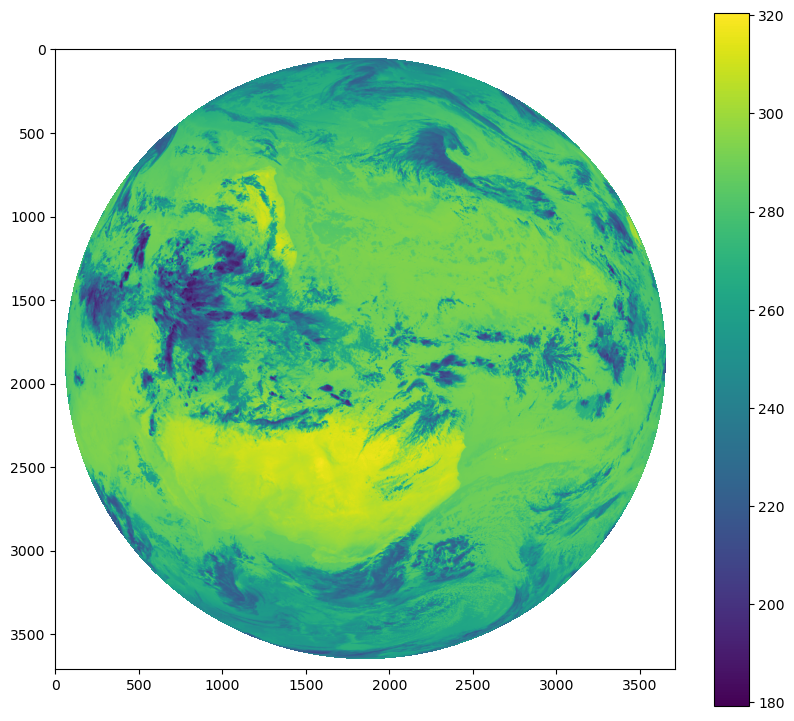

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(scn[my_channel])
plt.colorbar()

We can use matplotlib calls manually like above, but Xarray also provides its own plotting utility functions to make this easier. Xarray also takes into account the coordinates of the data and in this case plots the MSG disk in the "right" orientation.

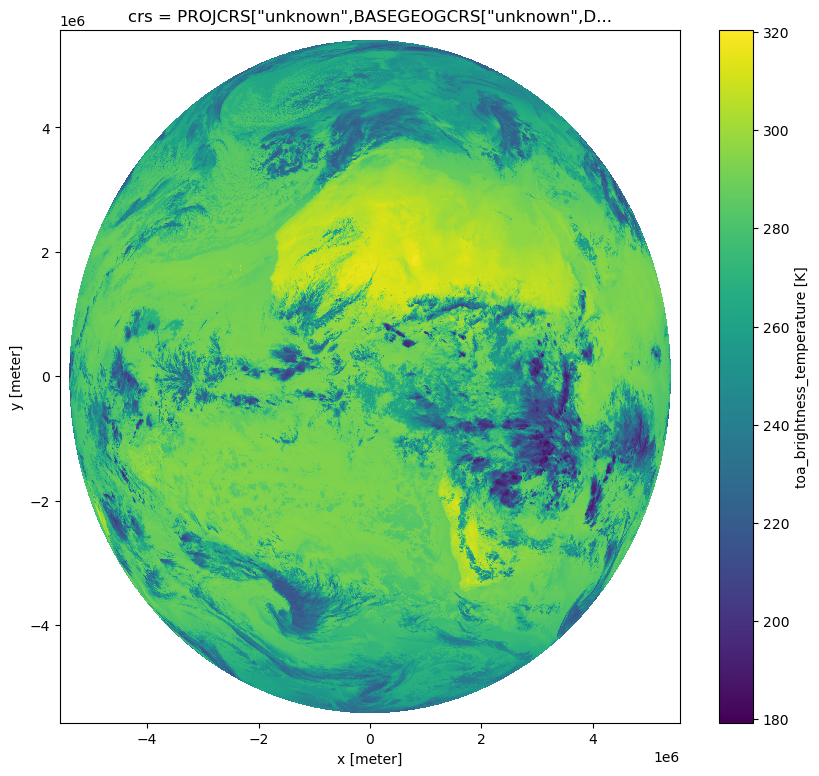

In [27]:
plt.figure()
scn[my_channel].plot.imshow(cmap='viridis')

If we compare the metadata in our DataArray's `.attrs` with what labels are on the plot, we can see where Xarray has made its best guess about what to name components of the plot. It used attributes like `long_name` for the colorbar and the names of the dimensions for the axis labels. Xarray's plotting utilities are simple wrappers around matplotlib so we still have access to everything from matplotlib. We can add common matplotlib function calls like `plt.title(my_channel)` to the above cell, for example, to change the title.

We can also change the colormap by passing the `cmap` keyword argument to the call to `imshow` (ex. `cmap='viridis'`). For a full list of the builtin matplotlib colormaps see the [matplotlib documentation](https://matplotlib.org/tutorials/colors/colormaps.html). By default matplotlib will use `viridis` but we can also try others like `plasma`, `magma`, `RdBu_r`, `Reds`, or `tab20b`.

## Slicing

Just like numpy arrays we can slice our `DataArray` to get data for a particular region. We'll use index slicing and striding to show a smaller region and a lower resolution of the HRV (`'HRV'`) product. Note how slicing does not remove the DataArray attributes. Slicing syntax is `start_index:end_index:stride` where start is inclusive and end is exclusive and stride means taking every X pixel.

In [30]:
# load HRV if we haven't already
scn.load(['HRV'])

# slice the DataArray and print out its representation
scn['HRV'][8500:9500:4, 2500:3500:4]

<xarray.DataArray 'concatenate-1c8d05c91f6635c965b6c0d5983158c7' (y: 250, x: 250)>
dask.array<getitem, shape=(250, 250), dtype=float32, chunksize=(116, 156), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] 2018-02-28T15:09:40.637000 ... 2018-02-28T15...
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 2.935e+06 2.939e+06 2.943e+06 ... 3.928e+06 3.932e+06
  * x         (x) float64 3.065e+06 3.061e+06 3.057e+06 ... 2.073e+06 2.069e+06
Attributes: (12/21)
    orbital_parameters:                     {'projection_longitude': 0.0, 'pr...
    sun_earth_distance_correction_applied:  True
    georef_offset_corrected:                True
    units:                                  %
    nominal_end_time:                       2018-02-28 15:15:11.033130
    nominal_start_time:                     2018-02-28 15:00:10.814818
    ...                                     ...
    name:                                   HRV
    resolution:                             1000.134348869
    calibration:                            reflectance
    modifiers:                              ()
    _satpy_id:                              DataID(name='HRV', wavelength=Wav...
    ancillary_variables:                    []

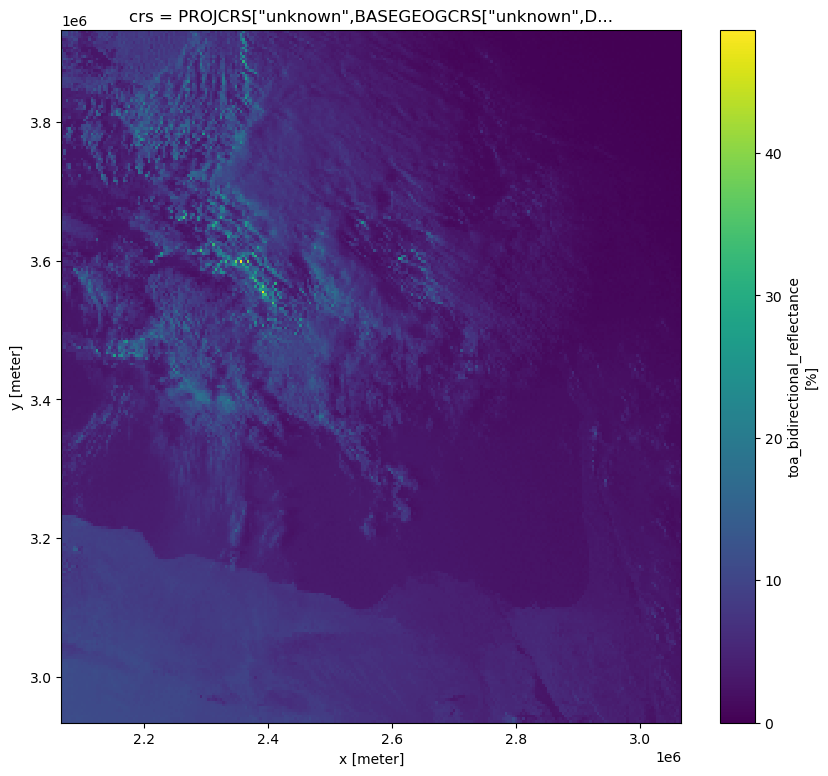

In [29]:
plt.figure()  # create a new figure
scn['HRV'][8500:9500:4, 2500:3500:4].plot.imshow()

### Exercise

**Time: 5-10 minutes**

Using the above examples as a guide, load additional channels, view them with matplotlib, and explore the data either by slicing/striding or by using matplotlib's interactive notebook widget (see toolbar at the bottom left of the image).

In [ ]:
# add you code here

### Coordinate Slicing

We can go one step further with the slicing provided by Xarray and slice our DataArray based on coordinates. We'll do more advanced versions of this in later lessons. In the below example we use the X and Y coordinates in meters to slice the data.

In [31]:
scn[my_channel].sel(x=slice(3070000, 2070000), y=slice(2900000, 3900000))

<xarray.DataArray 'from-value-045e95681888580097eed82322785651' (y: 333, x: 334)>
dask.array<getitem, shape=(333, 334), dtype=float32, chunksize=(333, 334), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] 2018-02-28T15:09:41.843000 ... 2018-02-28T15...
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 2.901e+06 2.904e+06 2.907e+06 ... 3.895e+06 3.898e+06
  * x         (x) float64 3.069e+06 3.066e+06 3.063e+06 ... 2.073e+06 2.07e+06
Attributes: (12/19)
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    georef_offset_corrected:  True
    nominal_end_time:         2018-02-28 15:15:11.033130
    nominal_start_time:       2018-02-28 15:00:10.814818
    wavelength:               12.0 µm (11.0-13.0 µm)
    standard_name:            toa_brightness_temperature
    ...                       ...
    name:                     IR_120
    resolution:               3000.403165817
    calibration:              brightness_temperature
    modifiers:                ()
    _satpy_id:                DataID(name='IR_120', wavelength=WavelengthRang...
    ancillary_variables:      []

## Accessing product variations

So far we've been referring to channels by their "name". These names are configured in Satpy's readers and can differ between instruments or even generations of the same instrument. Depending on your preferences, you may want to refer to products by wavelength. Not all products have a wavelength associated with them, but for those that do Satpy is configured with a minimum, nominal, and maximum wavelength specification for that instrument. We can use any wavelength within that range to access the data when loading data with the `.load` method or after.

In [32]:
scn[my_channel].attrs['wavelength']  # in µm

WavelengthRange(min=11.0, central=12.0, max=13.0, unit='µm')

In [33]:
0.7 in scn

True

In [34]:
scn[0.7].attrs['name']

'HRV'

Datasets can also vary in a couple other common ways, such as resolution (ex. 1000m versus 3000m), calibration (ex. reflectance versus radiance), and polarization (ex. V versus H). We can specify these when identifying products as well using a special `DatasetID` object or with keyword arguments in the `.load` method. To see a full list of the available data products we can use a new method called `Scene.available_dataset_ids`. We'll leave this as an exercise for the reader.

## Geolocation and Areas

Until now we've been dealing with the data as an image with no relation to the Earth. In Satpy, we use a special object in the `.attrs['area']` attribute to define where the data is located.

Some people prefer to use longitude and latitude coordinates when working with their data. In these cases we can use the area to get the longitude and latitude data.

In [1]:
lons, lats = scn[my_channel].attrs['area'].get_lonlats()
lons

NameError: name 'scn' is not defined

This function can take a while because by default it returns a numpy array. Let's tell it to return a dask array by specifying the `chunks=2048` keyword argument in the cell above.

In [ ]:
type(scn[my_channel].attrs['area'])

In [ ]:
scn[my_channel].attrs['area']

The "area" for our SEVIRI data is an `AreaDefinition` object from the `pyresample` library. This means that our data is uniformly gridded on a projected surface. This differs from data that may be non-uniform where the only way to address it is individual longitude and latitude coordinates.

We'll learn more about both of these situations in the resampling lesson later on.

## Available Readers

Lastly, let's explore what other readers Satpy current has. We'll use the `available_readers` function to give us a list of useable readers.

In [35]:
from satpy import available_readers
sorted(available_readers())

['abi_l1b',
 'abi_l1b_scmi',
 'abi_l2_nc',
 'acspo',
 'ahi_hrit',
 'ahi_hsd',
 'ahi_l1b_gridded_bin',
 'amsr2_l2_gaasp',
 'amsub_l1c_aapp',
 'atms_l1b_nc',
 'avhrr_l1b_aapp',
 'avhrr_l1b_eps',
 'avhrr_l1c_eum_gac_fdr_nc',
 'cmsaf-claas2_l2_nc',
 'electrol_hrit',
 'fci_l1c_nc',
 'fci_l2_nc',
 'geocat',
 'ghrsst_l2',
 'glm_l2',
 'goes-imager_hrit',
 'goes-imager_nc',
 'jami_hrit',
 'li_l2_nc',
 'meris_nc_sen3',
 'mhs_l1c_aapp',
 'mimicTPW2_comp',
 'mirs',
 'mtsat2-imager_hrit',
 'mviri_l1b_fiduceo_nc',
 'mws_l1b_nc',
 'nucaps',
 'nwcsaf-geo',
 'nwcsaf-pps_nc',
 'oceancolorcci_l3_nc',
 'olci_l1b',
 'olci_l2',
 'safe_sar_l2_ocn',
 'satpy_cf_nc',
 'seviri_l1b_hrit',
 'seviri_l1b_native',
 'seviri_l1b_nc',
 'slstr_l1b',
 'smos_l2_wind',
 'tropomi_l2',
 'vaisala_gld360',
 'viirs_edr_active_fires',
 'viirs_l1b',
 'viirs_l2_cloud_mask_nc']

If we are missing any of the dependencies for some of Satpy's readers they won't be listed here. We can check what functionality we are missing by using `check_satpy` like we did in the Introduction.

# 3. Writing data to disk

Once we've loaded data we may want to save it to some on-disk format. Satpy provides multiple formats that it can save our data to using "writer" objects. Let's use Satpy's utility functions to learn what readers are available to us:

In [1]:
from satpy import available_writers
sorted(available_writers())

Could not import writer config from: ['/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/satpy/etc/writers/ninjogeotiff.yaml']
Could not import writer config from: ['/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/satpy/etc/writers/ninjotiff.yaml']
Could not import writer config from: ['/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/satpy/etc/writers/geotiff.yaml']


['awips_tiled', 'cf', 'mitiff', 'simple_image']

In the above output you should see 3-5 writers depending on how your python environment is set up. In this tutorial we'll be using the `geotiff`, `simple_image`, and `cf` writers. If we are missing any of the dependencies for some of Satpy's writers they won't be listed here. We can check what functionality we are missing by using `check_satpy` like we did in the Introduction.

## Images - GeoTIFF

We'll start out learning how to save geotiffs, Satpy's default writer, using the same data we did in the previous lesson. Let's create a `Scene` object and pick one of the 12 SEVIRI channels (ex. `IR_108`).

In [5]:
from satpy import Scene
from glob import glob

my_channel = 'IR_108'
filenames = glob('/kaggle/input/meteosat-11-l1b-hrit-201802281500/*')
filenames = glob('/home/louis/MATS/MATS-analysis/Louis/satpy_data/*')
scn = Scene(reader='seviri_l1b_hrit', filenames=filenames)
scn.load([my_channel])

One of the simplest ways to save all loaded data to disk is to use the save_datasets method of the Scene.

In [6]:
scn.save_datasets()

By default this method will save files to the current working directory (`.`).

Using notebook's `!` functionality we can run command line tools and investigate the file:

In [7]:
!pwd
!ls

/home/louis/MATS/MATS-analysis/Louis
de421.bsp		    Nadir_histo.py
examples		    satpy_data
geolocation.ipynb	    satpy-half-day-tutorial-with-msg-data.ipynb
geolocation.py		    tutorial-satpy-half-day
IR_108_20180228_150010.tif


In [8]:
!tiffinfo IR_108_20180228_150010.tif

TIFFReadDirectory: Warning, Unknown field with tag 34264 (0x85d8) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34736 (0x87b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34737 (0x87b1) encountered.
=== TIFF directory 0 ===
TIFF Directory at offset 0x8 (8)
  Image Width: 3712 Image Length: 3712
  Tile Width: 256 Tile Length: 256
  Bits/Sample: 8
  Sample Format: unsigned integer
  Compression Scheme: AdobeDeflate
  Photometric Interpretation: min-is-black
  Extra Samples: 1<unassoc-alpha>
  Samples/Pixel: 2
  Planar Configuration: single image plane
  DateTime: 2018:02:28 15:00:10
  Tag 34264: -3000.403279,0.000000,0.000000,5567248.283407,0.000000,3000.403279,0.000000,-5567248.283407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
  Tag 34735: 1,1,0,13,1024,0,1,32767,1025,0,1,1,1026,34737,8,0,2048,0,1,32767,2049,34737,75,8,2050,0,1,32767,2054,0,1,

Satpy has created an LA, or Luminance + Alpha, striped geotiff image compressed with the "DEFLATE" compression algorithm. From the `tiffinfo` output we can see information like the map projection parameters formatted in Well-known Text (WKT), image size, and image data type. GeoTIFF is not a standard web image format so we can't display them out-of-the-box in our browser. They are typically used by GIS tools like ArcGIS, QGIS, or with Web Mapping Services (WMS). Most image viewers can also display these images so navigating to the image file and opening it (double click) should open the image with ImageMagick on linux, Preview on OSX, and Windows Photo Viewer on Windows.

<sub>A better tool for looking at the geotiff information is `gdalinfo` which is unfortunately unavailable on kaggle.</sub>

Under the hood Satpy is using the `rasterio` and `GDAL` libraries to create the GeoTIFF. GDAL has [a lot of options](https://gdal.org/drivers/raster/gtiff.html#creation-options) for GeoTIFF creation and Satpy allows us to specify these when saving. Let's create a tiled GeoTIFF image which can be useful when hosting images on cloud services (see [COG](https://www.cogeo.org/) for details) and typically produces smaller files. We'll also use a dask utility called `ProgressBar` to provide feedback on the calculation.

In [9]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    scn.save_datasets(tiled=True, copy_src_overviews=True)

[########################################] | 100% Completed | 509.47 ms


Satpy overwrote the file we generated before. Let's use `tiffinfo` again to investigate the file.

In [10]:
!ls

de421.bsp		    Nadir_histo.py
examples		    satpy_data
geolocation.ipynb	    satpy-half-day-tutorial-with-msg-data.ipynb
geolocation.py		    tutorial-satpy-half-day
IR_108_20180228_150010.tif


In [11]:
!tiffinfo IR_108_20180228_150010.tif

TIFFReadDirectory: Warning, Unknown field with tag 34264 (0x85d8) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34736 (0x87b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34737 (0x87b1) encountered.
=== TIFF directory 0 ===
TIFF Directory at offset 0x8 (8)
  Image Width: 3712 Image Length: 3712
  Tile Width: 256 Tile Length: 256
  Bits/Sample: 8
  Sample Format: unsigned integer
  Compression Scheme: AdobeDeflate
  Photometric Interpretation: min-is-black
  Extra Samples: 1<unassoc-alpha>
  Samples/Pixel: 2
  Planar Configuration: single image plane
  DateTime: 2018:02:28 15:00:10
  Tag 34264: -3000.403279,0.000000,0.000000,5567248.283407,0.000000,3000.403279,0.000000,-5567248.283407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
  Tag 34735: 1,1,0,13,1024,0,1,32767,1025,0,1,1,1026,34737,8,0,2048,0,1,32767,2049,34737,75,8,2050,0,1,32767,2054,0,1,

We can see in the `tiffinfo` output above that our image data has 8 bits per sample unsigned integer. Sometimes you may want to store data in a GeoTIFF as floating point numbers. Let's do one more GeoTIFF example and use some additional keyword arguments to customize our output.

In [12]:
import numpy as np

with ProgressBar():
    scn.save_datasets(base_dir='float_images', filename='{name}.float.tif',
                      dtype=np.float32, enhance=False)

[########################################] | 100% Completed | 204.29 ms


In [13]:
!ls float_images
!tiffinfo float_images/IR_108.float.tif

IR_108.float.tif
TIFFReadDirectory: Warning, Unknown field with tag 34264 (0x85d8) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34736 (0x87b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34737 (0x87b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42113 (0xa481) encountered.
=== TIFF directory 0 ===
TIFF Directory at offset 0x8 (8)
  Image Width: 3712 Image Length: 3712
  Tile Width: 256 Tile Length: 256
  Bits/Sample: 32
  Sample Format: IEEE floating point
  Compression Scheme: AdobeDeflate
  Photometric Interpretation: min-is-black
  Samples/Pixel: 1
  Planar Configuration: single image plane
  DateTime: 2018:02:28 15:00:10
  Tag 34264: -3000.403279,0.000000,0.000000,5567248.283407,0.000000,3000.403279,0.000000,-5567248.283407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
  Tag 34735: 1,1,0,13,1024,0,1,32767,1025,0,1,1,1026

We've now created a 32-bit float GeoTIFF to use in GIS applications or other software to do more analysis. We used the `base_dir` keyword argument to specify a new directory where we wanted our files saved. We specified the `enhance=False` argument to tell Satpy to not scale observed data values (Kelvin, percentages, etc) to image values (0-255); there will be more on this in later lessons. We also provided a custom filenaming scheme with the `filename` keyword argument.

### Exercise

**Time: 5 minutes**

A key point here is that the filenaming scheme can use any attribute that is in a DataArray's `.attrs` dictionary. To try this, update the filename pattern in the previous `save_datasets` call to add the `standard_name` or `start_time` or any other attribute. What filenames are produced?

## Images - PNG, JPEG, etc

So far we've created GeoTIFFs using the `'geotiff'` writer, but we can also create PNGs and other basic image formats by using the `'simple_image'` writer which takes advantage of the many formats supported by the PIL package.

In [14]:
with ProgressBar():
    scn.save_datasets(writer='simple_image')

[########################################] | 100% Completed | 2.93 sms


In [15]:
!ls

de421.bsp		    IR_108_20180228_150010.tif
examples		    Nadir_histo.py
float_images		    satpy_data
geolocation.ipynb	    satpy-half-day-tutorial-with-msg-data.ipynb
geolocation.py		    tutorial-satpy-half-day
IR_108_20180228_150010.png


We could view this image like we did the GeoTIFF, with our system's image viewer, or we could view it in the browser. However, by default Satpy has saved the entire image array to the file so viewing a couple of them may be an issue for our browser. In future lessons we'll learn of ways to change the resolution of our data before saving it to disk.

Instead of specifying the `writer` explicitly we could have let Satpy determine the best writer to use based on the filename. Using what we learned about `filename` before, let's update the below call to save a PNG image with the `.png` extension.

In [17]:
scn.save_datasets(base_dir='PNG_images', filename='{name}.png')

# CF-compliant NetCDF Files

In addition to image formats, we may want to save our data in more common data file formats. A very common format when working with satellite imagery data is the NetCDF format (.nc) with metadata matching the Climate and Forecast (CF) metadata conventions. We'll use the `'cf'` writer for this, the default writer for any file ending in `.nc`.

Let's create a new Scene, load a couple channels, and save it to a NetCDF file.

In [18]:
scn = Scene(reader='seviri_l1b_hrit', filenames=filenames)
scn.load(['VIS008', 'WV_062', 'IR_108'])

In [19]:
with ProgressBar():
    scn.save_datasets(filename='my_seviri_data.nc', engine='netcdf4')

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/satpy/writers/cf_writer.py:576: FutureWarning: The default behaviour of the CF writer will soon change to not compress data by default.
  warnings.warn("The default behaviour of the CF writer will soon change to not compress data by default.",
No time dimension in datasets, skipping time bounds creation.


[########################################] | 100% Completed | 1.23 sms


In [20]:
!ls

de421.bsp		    my_seviri_data.nc
examples		    Nadir_histo.py
float_images		    PNG_images
geolocation.ipynb	    satpy_data
geolocation.py		    satpy-half-day-tutorial-with-msg-data.ipynb
IR_108_20180228_150010.png  tutorial-satpy-half-day
IR_108_20180228_150010.tif


In [21]:
!ncdump -h my_seviri_data.nc

netcdf my_seviri_data {
dimensions:
	y = 3712 ;
	x = 3712 ;
variables:
	int64 msg_seviri_fes_3km ;
		msg_seviri_fes_3km:crs_wkt = "PROJCRS[\"unknown\",BASEGEOGCRS[\"unknown\",DATUM[\"unknown\",ELLIPSOID[\"unknown\",6378169,295.488065897014,LENGTHUNIT[\"metre\",1,ID[\"EPSG\",9001]]]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8901]]],CONVERSION[\"unknown\",METHOD[\"Geostationary Satellite (Sweep Y)\"],PARAMETER[\"Longitude of natural origin\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8802]],PARAMETER[\"Satellite Height\",35785831,LENGTHUNIT[\"metre\",1,ID[\"EPSG\",9001]]],PARAMETER[\"False easting\",0,LENGTHUNIT[\"metre\",1],ID[\"EPSG\",8806]],PARAMETER[\"False northing\",0,LENGTHUNIT[\"metre\",1],ID[\"EPSG\",8807]]],CS[Cartesian,2],AXIS[\"(E)\",east,ORDER[1],LENGTHUNIT[\"metre\",1,ID[\"EPSG\",9001]]],AXIS[\"(N)\",north,ORDER[2],LENGTHUNIT[\"metre\",1,ID[\"EPSG\",9001]]]]" ;
		msg_seviri_fes_3km:false_easting = 0. ;
		msg_seviri_fes_3km:fals

Note how this handled the x/y coordinate variables for us as well as the CF `grid_mapping` variable. By default Satpy also created `longitude` and `latitude` variables for users who are more comfortable with degrees instead of projection meters. There are [a lot of options](https://satpy.readthedocs.io/en/latest/api/satpy.writers.html#module-satpy.writers.cf_writer) we can configure for this writer including to turn of the longitude and latitude variable creation, grouping variables, and more. Exploring these options is out of the scope for this tutorial and is left as an exercise for the reader.

### Further Research

 * [Scene.save_dataset][1]
 * [GeoTIFF creation options][2]
 * [NetCDF creation options][3]

  [1]: https://satpy.readthedocs.io/en/latest/api/satpy.html#satpy.scene.Scene.save_dataset
  [2]: https://gdal.org/drivers/raster/gtiff.html#creation-options
  [3]: https://satpy.readthedocs.io/en/latest/api/satpy.writers.html#module-satpy.writers.cf_writer

# 4. Resampling

One of the more complex topics when it comes to working with earth-observing satellite data is geographic projections and resampling data to these different projections.

This is how the book "Map Projections" by Battersby describe map projections:

> Map projection is the process of transforming angular (spherical / elliptical) coordinates into planar coordinates. All map projections introduce distortion (e.g., to areas, angles, distances) in the resulting planar coordinates. Understanding what, where, and how much distortion is introduced is an important consideration for spatial computations and visual interpretation of spatial patterns, as well as for general aesthetics of any map.

<img src="http://gistbok.ucgis.org/sites/default/files/figure2-projections.png" width="450px"/>

<sub>Credit: Battersby, S. (2017). Map Projections. The Geographic Information Science & Technology Body of Knowledge (2nd Quarter 2017 Edition), John P. Wilson (ed.). DOI: <a href="http://gistbok.ucgis.org/bok-topics/map-projections">10.22224/gistbok/2017.2.7</a></sub>

To simplify projections and resampling for this tutorial, we can think of resampling as mapping data from one projection to another. Projections describe a flat version of our round Earth that is easier to describe. Different people or visualization tools may prefer a certain projection for the data they look at. When comparing data from multiple sources it can be convenient to have them all on the same projection. Let's explore this with real data.

In [22]:
scn = Scene(reader='seviri_l1b_hrit', filenames=filenames)
scn.load(['VIS008'])

In [23]:
scn['VIS008'].attrs['area']

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (5567248.2834, 5570248.6867, -5570248.6867, -5567248.2834)

The `'area'` attribute of our Satpy data is a special `AreaDefinition` and it defines the geographic area that our data covers. Under `Projection` we see a python dictionary of projection parameters to define that flat plane representation of the Earth. Our ABI data is on a `'geos'` or Geostationary Satellite View coordinate system where position is measured in meters on the the X and Y axes. You can learn more about that on the PROJ site [here](https://proj.org/operations/projections/geos.html). Depending on how we change these parameters we can end up with something like the below view of the Earth or something completely different.

<img src="https://proj.org/_images/geos.png" width="300"/>

Alternatively, we could read data on a completely different projection like the [Lambert Conformal Conic](https://proj.org/operations/projections/lcc.html) projection and be looking at a view like the image below.

<img src="https://proj.org/_images/lcc.png" width="300"/>

What projection we have depends on the satellite and who provided our data to us. What projection we want on the output depends on what our end goal is. Do we want to compare our data with another satellite instrument's? Do we want to view our data in a projection that is less distorted for our region of interest?

In addition to the geostationary projection information, our `AreaDefinition` specifies an exact location on that projection space: the lower-left corner (in projection meters), the upper-right corner, and the number of row and column pixels.

We've already loaded `'VIS008'`, let's load the `'HRV'` channel too and compare them to get a better experience with projections and comparing data.

In [24]:
scn.load(['HRV'])
scn['HRV'].attrs['area']

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyresample/geometry.py:1512: RuntimeWarning: invalid value encountered in double_scalars
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyresample/geometry.py:1512: RuntimeWarning: invalid value encountered in double_scalars
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyresample/geometry.py:1512: RuntimeWarning: invalid value encountered in double_scalars
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyresample/geometry.py:1512: RuntimeWarning: invalid value encountered in double_scalars
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/p

Area ID: msg_seviri_fes_1km
Description: MSG SEVIRI Full Earth Scanning service area definition with 1 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 11136
Number of rows: 11136
Area extent: (5566247.741, 5571248.4127, -5571248.4127, -5566247.741)

In [25]:
scn['VIS008'].attrs['area']

Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (5567248.2834, 5570248.6867, -5570248.6867, -5567248.2834)

Notice the difference in size (rows and columns) between the two area definitions, the small difference in extents, but also how the projection parameters are exactly the same. This is because these two channels are on the same projection (coordinate system), but their individual pixels are different **resolutions**. Each of the HRV channel's pixels represents 1 kilometer on the geostationary projection and 3 kilometers for each of the IR_108 channel's pixels.

Trying to compare these with normal array operations would be difficult due to the differences in array shape. Instead we can manipulate and resample the data to allow simpler calculations going forward. We can do this using Satpy's `Scene.resample` method which provides multiple algorithms for resampling data. We'll start by using the very simple `'native'` resampler.

In [26]:
new_scn = scn.resample(resampler='native')
new_scn['HRV'].shape == new_scn['VIS008'].shape

True

The resample method has given a new `Scene` object with every DataArray we had before, but resampled to the same area or region. By default, it used the highest resolution `AreaDefinition` of the input data (`scn.max_area()`). In this case that's the 1km area from `C05`. If we look at the area of `C06` now we can see it is also at 1km.

In [27]:
new_scn['VIS008'].attrs['area']

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: msg_seviri_fes_1km
Description: MSG SEVIRI Full Earth Scanning service area definition with 1 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 11136
Number of rows: 11136
Area extent: (5566247.741, 5571248.4127, -5571248.4127, -5566247.741)

The `native` resampler we used has two possible operations:

1. If remapping data to a higher resolution, replicate each pixel to make the shape matches.
2. If remapping data to a lower resolution, average/aggregate the pixels to make the shapes match.

Now that our two loaded channels have the same shape, we can easily compare them. Let's take the difference between the two channels and plot it. Note that we are using the resampled `new_scn` and **NOT** the original `scn` object.

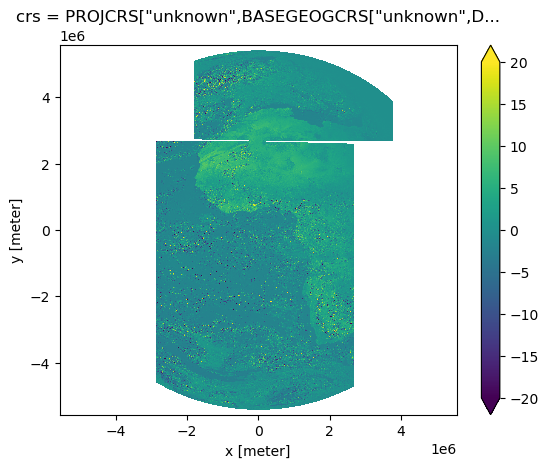

In [28]:
import matplotlib.pyplot as plt

diff = new_scn['VIS008'] - new_scn['HRV']
diff.plot.imshow(vmin=-20, vmax=20)

The `native` resampler can be very useful when you need to combine bands from the same instrument that have different resolutions. However, it is limited because it only operates on data on the same projection and with data that can be easily replicated or aggregated (1km -> 3km but not 375m -> 1km).

To do more complicated resampling we rely on other resampling algorithms, the simplest being the `nearest` resampler for nearest neighbor resampling. Let's create our own custom AreaDefinition to resample to with our own projection. For this, we'll use Pyresample's `create_area_def` utility function. Running the following cell (with the `?`) will open a new pane with the documentation for the `create_area_def` function. We can use this information to start building a new area to resample to. Feel free to close the pane when you're done using it.

In [29]:
from pyresample import create_area_def
create_area_def?

Signature:
create_area_def(
    area_id,
    projection,
    width=None,
    height=None,
    area_extent=None,
    shape=None,
    upper_left_extent=None,
    center=None,
    resolution=None,
    radius=None,
    units=None,
    **kwargs,
)
Docstring:
Create AreaDefinition from whatever information is known.

Parameters
----------
area_id : str
    ID of area
projection : pyproj CRS object, dict, str, int, tuple, object
    Projection parameters.  This can be in any format understood by
    :func:`pyproj.crs.CRS.from_user_input`, such as a pyproj CRS object,
    proj4 dict, proj4 string, EPSG integer code, or others.
description : str, optional
    Description/name of area. Defaults to area_id
proj_id : str, optional
    ID of projection (deprecated)
units : str, optional
    Units that provided arguments should be interpreted as. This can be
    one of 'deg', 'degrees', 'meters', 'metres', and any
    parameter supported by the
    `cs2cs -lu <https://proj4.org/apps/cs2cs.html#cmdop

In [30]:
my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': 0, 'lat_0': 25, 'lat_1': 35},
                          width=1000, height=1000,
                          area_extent=[-10, 20, 10, 40], units='degrees')
my_area

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: my_area
Description: my_area
Projection: {'datum': 'WGS84', 'lat_0': '25', 'lat_1': '35', 'lat_2': '0', 'lon_0': '0', 'no_defs': 'None', 'proj': 'lcc', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 1000
Number of rows: 1000
Area extent: (-998523.853, -503501.0845, 882383.646, 1671346.3601)

In [32]:
new_scn = scn.resample(my_area)

We can see from the above AreaDefinition print out that we've created an area using the [Lambert Conformal Conic](https://proj.org/operations/projections/lcc.html) projection that is 1000 rows by 1000 columns. The "Area extent" tells us, in the projection space metered coordinates, where our lower left and upper right corners are. We can look at some commmon area properties to get more information on this area we've created, like the resolution of each pixel.

In [33]:
my_area.pixel_size_x, my_area.pixel_size_y

(1880.9074989808491, 2174.8474445087527)

So with a 1000x1000 grid of pixels covering this geographic area, we've made it so each pixel represents 1880 meters in the X dimension and 2175 meters in the Y dimension.

Let's use Xarray's plotting utilities again to see what this looks like. We'll specify `vmin` and `vmax` to be between 0% and 100% as good initial limits for the colorbar given the traditional limits of reflectance data.

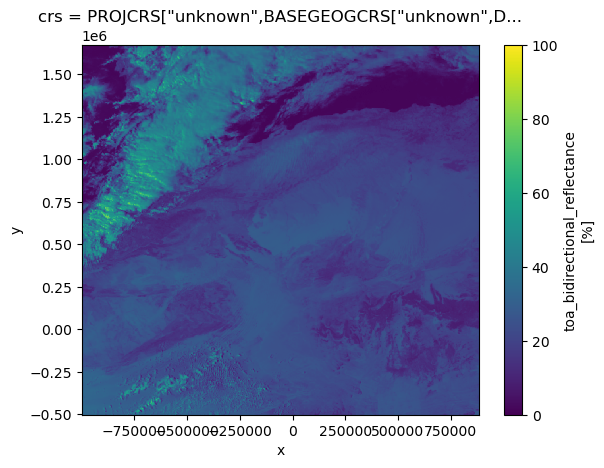

In [34]:
plt.figure()
new_scn['VIS008'].plot.imshow(vmin=0, vmax=100)

So in a couple lines of code we've changed the projection, resolution, and overall size of our data. More importantly, our data that started out at different resolutions have been resampled to the same geographic area and resolution so they can be worked with more easily.

## Dynamic Areas

However, the area we made required us to know the exact region of the Earth we wanted. What if we only knew some of the information and wanted to use our data to fill in the rest. The `create_area_def` function handles this too by creating a `DynamicAreaDefinition` if needed. Let's make a dynamic area where we know the projection and the resolution we want for each pixel (5000 meters). Pay attention to how long each step takes to compute compared to the previous calls.

In [35]:
my_dynamic_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': 0, 'lat_0': 25, 'lat_1': 35},
                                  resolution=5000)
my_dynamic_area

In [36]:
dynamic_scn = scn.resample(my_dynamic_area)
dynamic_scn['VIS008'].shape

(7234, 4748)

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


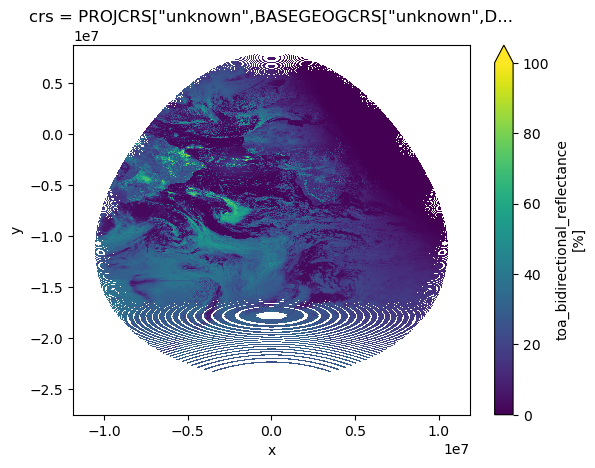

In [37]:
plt.figure()
dynamic_scn['VIS008'].plot.imshow(vmin=0, vmax=100)

What you should have noticed is that the call to `resample` took longer than before. This was caused by the calculations necessary to determine how large the resuling area had to be to encompass all of the data.

Additionally, the plotting calls should take longer because we are asking for much more data to be resampled and for more data to be plotted. Remember, the dask arrays only load and compute data when it is needed; in this case the area computation and the plotting.

### Exercise

**Time: 10 minutes**

Use the below cells to plot the SEVIRI data on different projections, tweak the projection parameters, or use dynamic areas to resample all of the area. Note how the output changes as projection parameters and area extents change. Projection changes may not be easy to notice on a small scale.

Some projection suggestions:

1. `{'proj': 'merc', 'lon_0': 0}`
2. `{'proj': 'lcc', 'lon_0': 0, 'lat_0': 45, 'lat_1': 55, 'lat_2': 65}`
3. `{'proj': 'stere', 'lon_0': 0, 'lat_ts': 25}`

Be careful to not make areas that are too large (many pixels) or you may be waiting a while for processing to finish.

If time permits, try loading other channels to the `scn` object (we currently have HRV and VIS008), changing the extent of the area, trying other matplotlib features, changing the vmin/vmax parameters, or researching other projections. For a full list of supported projections and their options see the [PROJ documentation](https://proj.org/operations/projections/index.html).

In [ ]:
custom_area = create_area_def('my_area', {'proj': 'merc', 'lon_0': 0},
                              width=1000, height=1000,
                              area_extent=[-10, 15, 10, 40], units='degrees')
custom_area

In [ ]:
custom_scn = scn.resample(custom_area)

In [ ]:
plt.figure()
custom_scn['VIS008'].plot.imshow(vmin=0, vmax=100)

## Cropping and Aggregating

Let's say we didn't want to change projection but only wanted to "cut out" a portion of the data or reduce the resolution of our data. Satpy provides the `Scene.crop` and `Scene.aggregate` methods to help us with this.

We'll start by using that same ABI Mesoscale Scene we used before. Let's say we wanted to cut out a specific region, but we only knew the longitude and latitude coordinates. By using information from the data's `AreaDefinition` we can use cut out a particular region of the data without having to do any expensive resampling.

In [38]:
crop_scn = scn.crop(ll_bbox=[-2.0, 34.0, 0.0, 36.0])
crop_scn['VIS008'].shape

(54, 60)

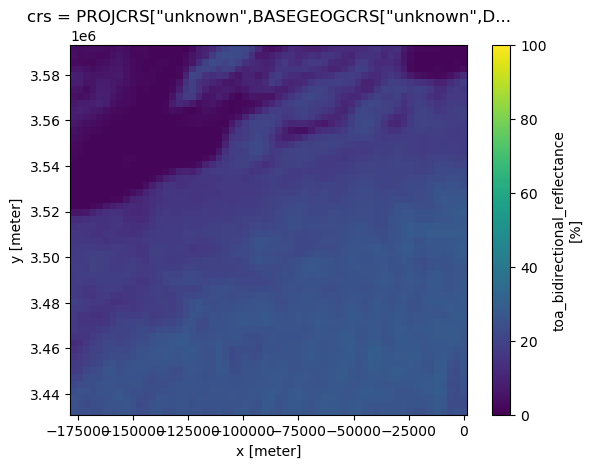

In [39]:
plt.figure()
crop_scn['VIS008'].plot.imshow(cmap='viridis', vmin=0, vmax=100)

Perhaps we wanted to see the whole image, but we didn't need the highest resolution of all of the data. We can use the `Scene.aggregate` method to reduce our overall array size. Here we'll say we want to take the mean (default) of every 8x8 pixels in the `y` and `x` dimension.

In [40]:
agg_scn = scn.aggregate(y=10, x=10)
agg_scn['VIS008'].shape

(371, 371)

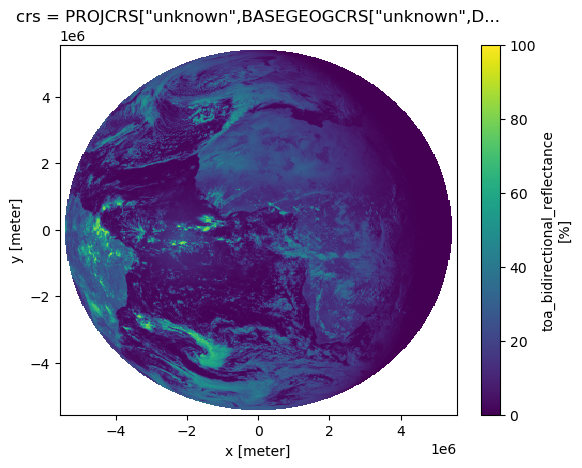

In [41]:
plt.figure()
agg_scn['VIS008'].plot.imshow(vmin=0, vmax=100)

The `aggregate` function takes a couple different possible functions for how it combines the data. Let's say instead of the `mean` we want the `max` value.

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/dask/array/reductions.py:649: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


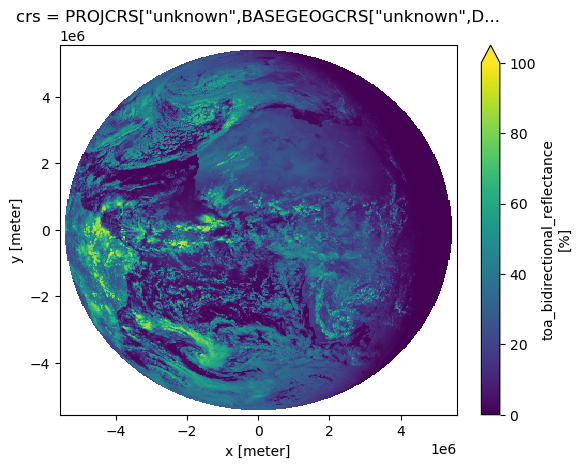

In [42]:
plt.figure()
agg_scn = scn.aggregate(y=10, x=10, func='max')
agg_scn['VIS008'].plot.imshow(vmin=0, vmax=100)

We've now finished learning about the `resample`, `crop`, and `aggregate` methods for taking data as provided and manipulating it to be the resolution, size, and region that we wish to analyze.

## Further Research

 * [Other resampling algorithms][1]
 * [Caching Resampling][2]
 * [Store areas for reuse][3]
 
  [1]: https://satpy.readthedocs.io/en/latest/api/satpy.html#module-satpy.resample
  [2]: https://satpy.readthedocs.io/en/latest/resample.html#caching-for-geostationary-data
  [3]: https://satpy.readthedocs.io/en/latest/resample.html#store-area-definitions

# 5. RGBs and Other Composites

Meteorological satellite instrument bands provide a look at the Earth at various wavelengths. Each band represents the electro-magnetic radiation observed at one wavelength or range of wavelengths. While this is very useful, flexible, and requires a very limited amount of processing to visualize, it does require that the viewer know what to expect from each band or wavelength. In addition to viewing individual bands, another common option for viewing satellite data is to combine multiple bands in to one image such as RGB (Red, Green, Blue) images. By assigning certain bands to particular channels in the output RGB image we can provide an easy way to identify features in the data. Instead of having to know what a particular wavelength is sensitive to, we can now focus on what colors in particular RGB recipe mean.

Using our SEVIRI data from before, let's look at some of the built-in RGB composites provided by Satpy.

In [43]:
scn.available_composite_names()

['airmass',
 'ash',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloudtop',
 'cloudtop_daytime',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics',
 'day_microphysics_winter',
 'dust',
 'fog',
 'green_snow',
 'hrv_clouds',
 'hrv_fog',
 'hrv_severe_storms',
 'hrv_severe_storms_masked',
 'ir108_3d',
 'ir_cloud_day',
 'ir_overview',
 'ir_sandwich',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'natural_color_raw_with_night_ir',
 'natural_color_with_night_ir',
 'natural_color_with_night_ir_hires',
 'natural_enh',
 'natural_enh_with_night_ir',
 'natural_enh_with_night_ir_hires',
 'natural_with_night_fog',
 'night_fog',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'overview_raw',
 'realistic_colors',
 'rocket_plume_day',
 'rocket_plume_night',
 'snow',
 'vis_sharpened_ir']

The above list shows what composites Satpy knows how to make and that it has the inputs for. A lot of the recipes in Satpy come from standard recipes from science agencies like EUMETSAT, NOAA, or NASA. Let's first look at the `airmass` RGB. The `airmass` RGB is made of the following bands:

```
R: C08 - C10
G: C12 - C13
B: C08
```

The red channel is the difference between the C08 (6.185µm) and C10 (7.34µm) bands, the green channel is the difference between the C12 (9.61µm) and C13 (10.35µm) bands, and the blue channel is the C08 (6.185µm) band.

The EUMETSAT EUMeTrain manual summarizes the use of the `airmass` RGB as:

> As both water vapor channels (WV 6.2 µm and WV 7.3 µm) are included in this composite, the main applications are the detection of dynamic processes, such as rapid cyclogenesis, jet streams and PV anomalies.

Read more on the [EUMeTrain website](http://www.eumetrain.org/data/3/306/navmenu.php?tab=9&page=4.0.0).

In Satpy, we can load preconfigured composites like any normal file-provided product. Satpy will look at the recipe, determine what bands need to loaded, what modifications/corrections need to be applied to satisfy the recipe, and then give us the `DataArray` representing that RGB back.

In [44]:
scn.load(['airmass'])
scn['airmass']

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<xarray.DataArray 'where-fe7625d1b2d96e3306f99df37936dd11' (bands: 3, y: 3712,
                                                            x: 3712)>
dask.array<where, shape=(3, 3712, 3712), dtype=float32, chunksize=(1, 464, 3712), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 -5.566e+06 -5.563e+06 -5.56e+06 ... 5.566e+06 5.569e+06
  * x        (x) float64 5.566e+06 5.563e+06 5.56e+06 ... -5.566e+06 -5.569e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes: (12/20)
    platform_name:            Meteosat-11
    standard_name:            airmass
    reader:                   seviri_l1b_hrit
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    ancillary_variables:      []
    area:                     Area ID: msg_seviri_fes_3km\nDescription: MSG S...
    ...                       ...
    optional_datasets:        []
    name:                     airmass
    _satpy_id:                DataID(name='airmass', resolution=3000.403165817)
    prerequisites:            [DataQuery(name='_airmass_dep_0'), DataQuery(na...
    optional_prerequisites:   []
    mode:                     RGB

The key part of the above xarray output is that this is the first 3 dimensional DataArray we've worked with in Satpy with the (bands: 3, y: 1500, x: 2500) dimensions. The bands dimension tells us what each "band" represents. In this case Red, Green, and Blue channels of an RGB image.

In [45]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    scn.save_datasets(writer='simple_image')

[########################################] | 100% Completed | 18.45 ss


We can see in the image how the various bands combine in different ways and certain colors can represent specific states of the Earth.

Earlier in this tutorial we talked about "enhancing" data; the process of scaling data from observed scientific data values to image values (ex. 0-255 integers). This process was automatically done for us by the `save_datasets`. If we want to display our data in a matplotlib figure we need to do this manually. Satpy provides a `get_enhanced_image` utility function to simplify this.

We can tell xarray what dimension of our `DataArray` represents the "RGB" axis. We do this by passing the `rgb` keyword argument with the name of the dimension. In Satpy this dimension should always be called `'bands'`. Without this matplotlib would not be able to plot our RGB properly.

Lastly, we'll tell the `imshow` method that we *know* that our RGB will be between 0 and 1 with the `vmin` and `vmax` keyword arguments so there is no need to compute the min/max of the data.

Let's plot our `airmass` RGB composite.

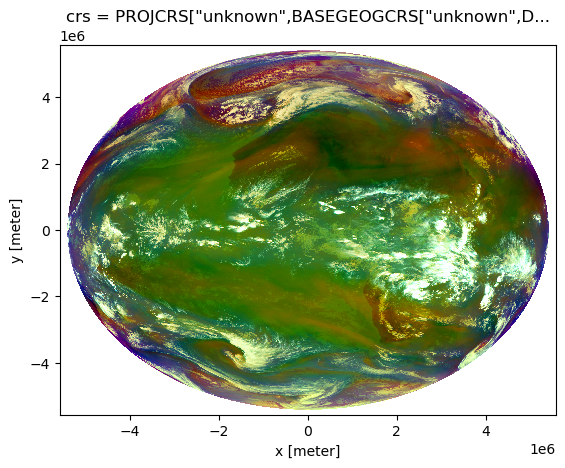

In [46]:
import matplotlib.pyplot as plt
from satpy.writers import get_enhanced_image

plt.figure()
img = get_enhanced_image(scn['airmass'])
# get DataArray out of `XRImage` object
img_data = img.data
img_data.plot.imshow(rgb='bands', vmin=0, vmax=1)

## Compositing Different Resolutions

When generating the `airmass` RGB we were fortunate in that all of the input data was the same resolution. Let's look at the `hrv_clouds` RGB now, where the input resolutions differ.

For the SEVIRI instrument this composite is a combination of the following channels:

```
R: HRV (1000m)
G: HRV (1000m)
B: IR_108 (3000m)
```

This means that we are trying to combine arrays of different shapes. The only way we know to make data the same resolution and make it easier to compare or combine, is to resample. Let's load this composite and see how Satpy handles generating a composite like this.

In [47]:
scn.load(['hrv_clouds'])

The following datasets were not created and may require resampling to be generated: DataID(name='hrv_clouds')


In [48]:
'hrv_clouds' in scn

False

In [49]:
scn.missing_datasets

{DataID(name='hrv_clouds')}

We didn't do anything wrong, but Satpy doesn't have a `hrv_clouds` composite in the `Scene`. Satpy knows that the reason it wasn't able to generate this composite was because the data was not all the same resolution. The `Scene` knows that we need to resample before we can be able to generate this composite. Let's do that now by using the `native` resampler. We'll also use the `min_area` method to aggregate the data to the lowest resolution in the Scene; 2km in this case (from the `airmass` dependencies):

In [50]:
new_scn = scn.resample(scn.max_area(), resampler='native')
new_scn['hrv_clouds']

/home/louis/miniconda3/envs/mats-analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<xarray.DataArray 'where-a0acd5e77e5ad5cd3bb511c5de16949e' (bands: 3, y: 11136,
                                                            x: 11136)>
dask.array<where, shape=(3, 11136, 11136), dtype=float32, chunksize=(1, 464, 4496), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 -5.566e+06 -5.565e+06 -5.564e+06 ... 5.57e+06 5.571e+06
  * x        (x) float64 5.566e+06 5.565e+06 5.564e+06 ... -5.57e+06 -5.571e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes: (12/19)
    ancillary_variables:      []
    area:                     Area ID: msg_seviri_fes_1km\nDescription: MSG S...
    nominal_start_time:       2018-02-28 15:00:10.814818
    georef_offset_corrected:  True
    platform_name:            Meteosat-11
    end_time:                 2018-02-28 15:12:43.956000
    ...                       ...
    name:                     hrv_clouds
    _satpy_id:                DataID(name='hrv_clouds')
    standard_name:            hrv_clouds
    prerequisites:            [DataQuery(name='HRV', modifiers=('sunz_correct...
    optional_prerequisites:   []
    mode:                     RGB

 Once resampling had completed, the `Scene` attempted to regenerate any composites that were previous requested. Once successfully generated the `hrv_clouds` RGB shows up like any other product. Let's follow the same procedure we used for plotting the `airmass` RGB, but for the `hrv_clouds` RGB. Note we are using the `new_scn` because the `hrv_clouds` RGB only exists in this resampled `Scene`.

In [51]:
with ProgressBar():
    plt.figure()
    img = get_enhanced_image(new_scn['hrv_clouds'])
    # get DataArray out of `XRImage` object
    img_data = img.data
    img_data.plot.imshow(vmin=0, vmax=1, rgb='bands')

[########################################] | 100% Completed | 10.89 s


: 

: 

## Custom RGBs

Now we've learned how to look at the available builtin composites, load them, and generate them. Let's make our own custom RGB. Let's recreate our Scene from before and load three channels that we'd like to put in an RGB.

In [1]:
scn = Scene(reader='seviri_l1b_hrit', filenames=filenames)
scn.available_dataset_names()

NameError: name 'Scene' is not defined

In [ ]:
r_band = 'EDITME'
g_band = 'EDITME'
b_band = 'EDITME'
scn.load([r_band, g_band, b_band])

Our `Scene` object now has three channels loaded. We'll now use the special `GenericCompositor` from Satpy's builtin composites to join these arrays together for us and make an RGB. Let's see what happens when we attempt this:

In [ ]:
from satpy.composites import GenericCompositor
comp = GenericCompositor('my_rgb')
my_rgb = comp((scn[r_band], scn[g_band], scn[b_band]))

If the channels you choose are different resolutions, you should have gotten an `IncompatibleAreas` exception from the above operation. Just like with `natural_color` before, this is Satpy's compositors telling us that our inputs are at different resolutions and they need to be resampled.

Let's resample using the `native` resampler to fix the resolutions and try regenerating our composite with the newly resampled `Scene`.

Do the below step even if you didn't receive an error. It isn't necessary, but will make the remaining instructions easier.

In [ ]:
new_scn = scn.resample(resampler='native')
my_rgb = comp((new_scn[r_band], new_scn[g_band], new_scn[b_band]))
my_rgb

We successfully generated an RGB `DataArray` object. Let's plot it and see what it looks like.

In [ ]:
plt.figure()
img = get_enhanced_image(my_rgb)
# get DataArray out of `XRImage` object
img_data = img.data
img_data.plot.imshow(vmin=0, vmax=1, rgb='bands')

The above image may look a little strange (really bright colors, really dull colors). This is because Satpy, unless configured otherwise, will scale RGBs between their minimum and maximum values, but this is usually not desired. We told xarray and matplotlib that our RGB's data was between 0 and 1, but depending on the channels you chose it was actually much higher than that (ex. 0-120% for reflectance, 200-250K for brightness temperatures).

### Exercise:

**Time: 10-15 minutes**

To find the ranges that make our data look the best, let's linearly scale our data below. We'll scale each band separately where the first number represents our minimum, the second our maximum, and the third is our minimum again. The end result should be an RGB `DataArray` where "main" part of our data is between 0 and 1. Keep in mind what type of data we are scaling; reflectances or brightness temperatures.

In [ ]:
r_norm = (new_scn[r_band] - 220) / (260 - 220)
g_norm = (new_scn[g_band] - 220) / (260 - 220)
b_norm = (new_scn[b_band] - 0) / (120 - 0)
my_rgb = comp((r_norm, g_norm, b_norm))

plt.figure()
my_rgb.plot.imshow(vmin=0, vmax=1, rgb='bands')

# 6. Contributing to Satpy

By completing this tutorial you've gotten an overview of the features that Satpy provides. You've seen examples of:

* Loading data
* Writing data
* Plotting data
* Creating composites
* Creating custom composites
* Creating MPEG4 videos
* Stacking multiple orbits in to one image
* Plotting loaded data with Cartopy
* Plotting loaded data with GeoViews

Although this tutorial has gone over a lot there is still more that Satpy can do and even more that it can't. That's where you come in as a contributor to the Satpy project. Satpy is an open source project and maintained by volunteers. Any help we can get is much appreciated.

If you think there are changes or features that could be made to Satpy to make your job easier, let us know. If you use Satpy and find a bug, let us know. Do you have a feature you want to implement or a bug you'd like to fix, let us know.

You can file bugs and features requests on [GitHub](https://github.com/pytroll/satpy). The Pytroll group also has a slack team where you can talk to us about your work, get help using Satpy, discuss Satpy design, or just talk about scientific programming. More information on how to contributor can be found in the [contributing guide](https://satpy.readthedocs.io/en/latest/dev_guide/CONTRIBUTING.html).

## Thank You

Credits:
This tutorial was originally created by David Hoese.
Adaptation to Kaggle and MSG: Martin Raspaud.

<img src="http://pytroll.github.io/logos/pytroll_light_small.png" width="400px"></img>